In [3]:
import numpy as np
import functions as fc
import fourier_continuation as fc_c
from timeit import default_timer as time
from fatiando.gravmag import polyprism, sphere
from fatiando import mesher, gridder,utils
from fatiando.constants import G, SI2MGAL
from scipy.sparse import diags
from matplotlib import pyplot as plt
from scipy.interpolate import griddata
from scipy import interpolate
from fatiando.vis import mpl
import cPickle as pickle
%matplotlib inline

## Open data and configuration

In [12]:
with open('synthetic_gz.pickle') as r:
    synthetic_gz = pickle.load(r)
    
xi = synthetic_gz['x']
yi = synthetic_gz['y']
zi = synthetic_gz['z']
dobs = synthetic_gz['gz_med']

shape = (100, 100)
area = [-5000, 5000, -4000, 4000]
R = 1000
xc, yc = -3000, 0

## True data plot

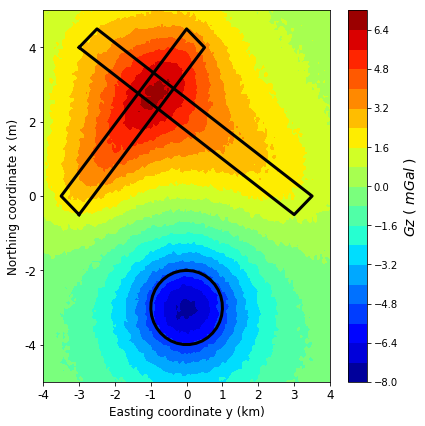

In [13]:
#Projection_model
phi = np.linspace(0, 2.*np.pi, 36)  #36 points
x = xc + R*np.cos(phi)
y = yc + R*np.sin(phi)

x_p = [-3000., -3500, 0, 500, -3000.]
y_p = [-500., 0, 4500, 4000, -500.]

x_p2 = [-3000, -2500, 3500, 3000, -3000.]
y_p2 = [4000, 4500, 0, -500, 4000]

# plot of the vertical component of the gravitational atraction at z=0 
plt.figure(figsize=(6,6))

plt.plot()
plt.tricontourf(yi,xi,dobs,22,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=3)
plt.plot(x_p2,y_p2,color="k", linewidth=3)
plt.plot(y, x, color="k", linewidth=3)
cb = plt.colorbar(shrink=1)
#plt.axis('scaled')
cb.set_label('$Gz$ ( $mGal$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi),np.max(yi))
plt.ylim(np.min(xi),np.max(xi))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Easting coordinate y (km)', fontsize=12)
plt.ylabel('Northing coordinate x (m)', fontsize=12)
mpl.m2km()
#plt.plot(yi, xi, 'ko-', alpha=0.1)
plt.tight_layout(True)
#plt.savefig('../manuscript/Fig/synthetic_data_med.png', dpi=300)

## Equivalent Layer Depth

In [14]:
# Equivalent Layer depth
zj = np.ones_like(zi)*300

## Fast Eq. Layer

In [15]:
# Predicted data
itmax = 40
s = time()
rho, gzp = fc.fast_eq(xi,yi,zi,zj,shape,dobs,itmax)
e = time()
tcpu = e - s
print tcpu, 'seconds'

8.2626313 seconds


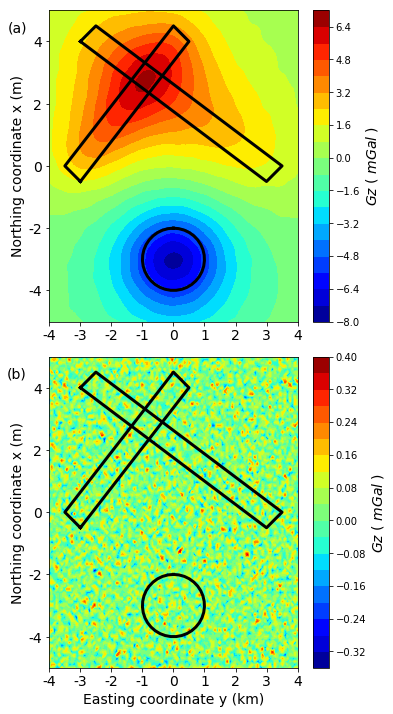

In [18]:
# plot of the vertical component of the gravitational atraction at z=0 
plt.figure(figsize=(5.5,10))

plt.subplot(211)
plt.title('(a)', y=0.91, x=-0.13, fontsize=14)
plt.tricontourf(yi,xi,gzp,22,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=3)
plt.plot(x_p2,y_p2,color="k", linewidth=3)
plt.plot(y, x, color="k", linewidth=3)
cb = plt.colorbar(shrink=1)
#plt.axis('scaled')
cb.set_label('$Gz$ ( $mGal$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi),np.max(yi))
plt.ylim(np.min(xi),np.max(xi))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel('Easting coordinate y (km)', fontsize=14)
plt.ylabel('Northing coordinate x (m)', fontsize=14)
mpl.m2km()

delta_gz = gzp-dobs
plt.subplot(212)
plt.title('(b)', y=0.91, x=-0.13, fontsize=14)
plt.tricontourf(yi,xi,delta_gz,22,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=3)
plt.plot(x_p2,y_p2,color="k", linewidth=3)
plt.plot(y, x, color="k", linewidth=3)
cb = plt.colorbar(shrink=1)
#plt.axis('scaled')
cb.set_label('$Gz$ ( $mGal$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi),np.max(yi))
plt.ylim(np.min(xi),np.max(xi))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Easting coordinate y (km)', fontsize=14)
plt.ylabel('Northing coordinate x (m)', fontsize=14)
mpl.m2km()
plt.tight_layout(True)
#plt.savefig('../manuscript/Fig/classic_fast_med.png', dpi=300)

In [17]:
mean = np.mean(delta_gz)
print mean
std = np.std(delta_gz)
print std

-4.493313990381931e-05
0.09344858625342324


## Fast Eq. Layer BCCB

In [19]:
# Predicted data
itmax = 40
s = time()
rho_c, gzp_bccb = fc.fast_eq_bccb(xi,yi,zi,zj,shape,dobs,itmax)
e = time()
tcpu = e - s
print tcpu, 'seconds'

0.1030102 seconds


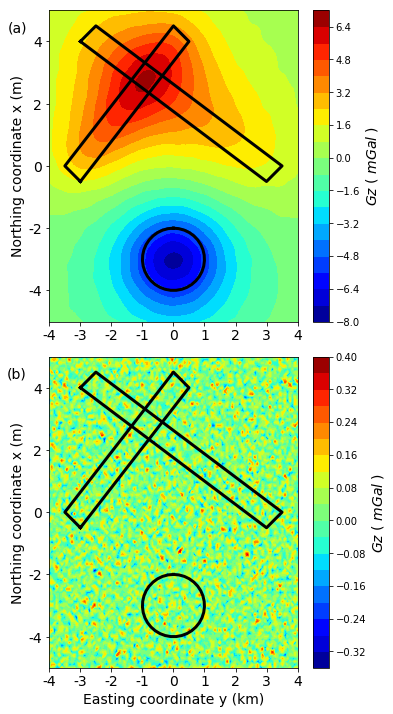

In [20]:
# plot of the vertical component of the gravitational atraction at z=0 
plt.figure(figsize=(5.5,10))

plt.subplot(211)
plt.title('(a)', y=0.91, x=-0.13, fontsize=14)
plt.tricontourf(yi,xi,gzp_bccb,22,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=3)
plt.plot(x_p2,y_p2,color="k", linewidth=3)
plt.plot(y, x, color="k", linewidth=3)
cb = plt.colorbar(shrink=1)
#plt.axis('scaled')
cb.set_label('$Gz$ ( $mGal$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi),np.max(yi))
plt.ylim(np.min(xi),np.max(xi))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel('Easting coordinate y (km)', fontsize=14)
plt.ylabel('Northing coordinate x (m)', fontsize=14)
mpl.m2km()

delta_gz_bccb = gzp_bccb-dobs
plt.subplot(212)
plt.title('(b)', y=0.91, x=-0.13, fontsize=14)
plt.tricontourf(yi,xi,delta_gz_bccb,22,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=3)
plt.plot(x_p2,y_p2,color="k", linewidth=3)
plt.plot(y, x, color="k", linewidth=3)
cb = plt.colorbar(shrink=1)
#plt.axis('scaled')
cb.set_label('$Gz$ ( $mGal$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi),np.max(yi))
plt.ylim(np.min(xi),np.max(xi))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Easting coordinate y (km)', fontsize=14)
plt.ylabel('Northing coordinate x (m)', fontsize=14)
mpl.m2km()
plt.tight_layout(True)
#plt.savefig('../manuscript/Fig/bccb_fast_med.png', dpi=300)

In [21]:
mean = np.mean(delta_gz)
print mean
std = np.std(delta_gz)
print std

-4.493313990381931e-05
0.09344858625342324


## Mass distribution plot

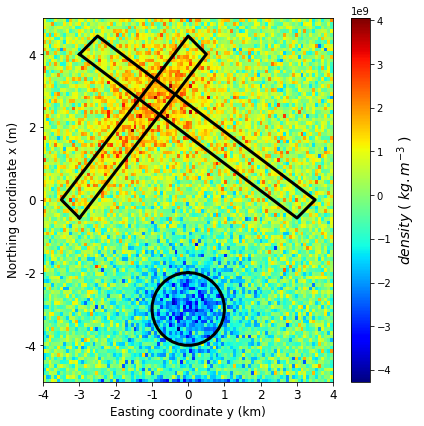

In [23]:
plt.figure(figsize=(6,6))

plt.plot()
plt.pcolormesh(yi.reshape(shape), xi.reshape(shape),
               rho_c.reshape(shape), cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=3)
plt.plot(x_p2,y_p2,color="k", linewidth=3)
plt.plot(y, x, color="k", linewidth=3)
cb = plt.colorbar(shrink=1)
cb.set_label('$density$ ( $kg.m^{-3}$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi),np.max(yi))
plt.ylim(np.min(xi),np.max(xi))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Easting coordinate y (km)', fontsize=12)
plt.ylabel('Northing coordinate x (m)', fontsize=12)
mpl.m2km()
#plt.plot(yi, xi, 'ko-', alpha=0.1)
plt.tight_layout(True)
#plt.savefig('figures/mass_distribution_bccb_med.png', dpi=300)
plt.show()

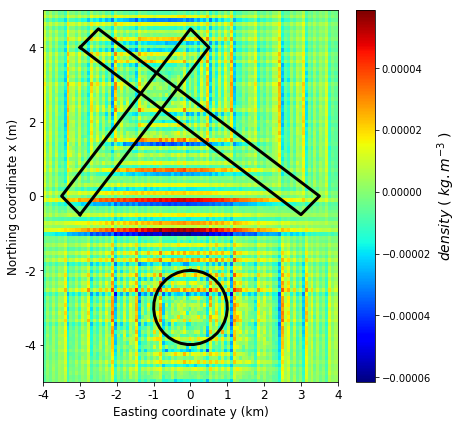

In [31]:
plt.figure(figsize=(6.5,6))
delta_rho = rho-rho_c
plt.plot()
plt.pcolormesh(yi.reshape(shape), xi.reshape(shape),
               delta_rho.reshape(shape), cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=3)
plt.plot(x_p2,y_p2,color="k", linewidth=3)
plt.plot(y, x, color="k", linewidth=3)
cb = plt.colorbar(shrink=1)
#plt.axis('scaled')
cb.set_label('$density$ ( $kg.m^{-3}$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi),np.max(yi))
plt.ylim(np.min(xi),np.max(xi))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Easting coordinate y (km)', fontsize=12)
plt.ylabel('Northing coordinate x (m)', fontsize=12)
mpl.m2km()
plt.tight_layout(True)
#plt.savefig('../manuscript/Fig/delta_rho_med.png', dpi=300)
plt.show()

## Comparison Fast Vs BCCB

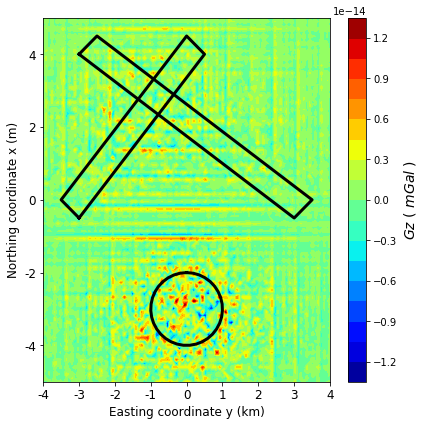

In [25]:
# plot of the vertical component of the gravitational atraction at z=0 
plt.figure(figsize=(6,6))
delta_gzp = gzp-gzp_bccb
plt.plot()
plt.tricontourf(yi,xi,delta_gzp,22,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=3)
plt.plot(x_p2,y_p2,color="k", linewidth=3)
plt.plot(y, x, color="k", linewidth=3)
cb = plt.colorbar()
#plt.axis('scaled')
cb.set_label('$Gz$ ( $mGal$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi),np.max(yi))
plt.ylim(np.min(xi),np.max(xi))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Easting coordinate y (km)', fontsize=12)
plt.ylabel('Northing coordinate x (m)', fontsize=12)
mpl.m2km()
plt.tight_layout(True)
#plt.savefig('../manuscript/Fig/delta_comparison_med.png', dpi=300)

In [26]:
mean = np.mean(delta_gzp)
print mean
std = np.std(delta_gzp)
print std

1.9828941006522217e-17
2.2903479562983943e-15


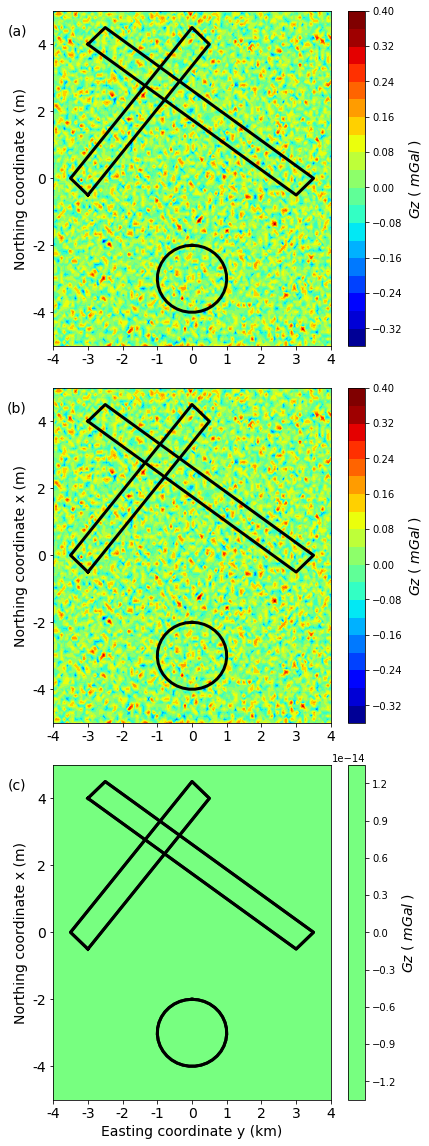

In [34]:
# plot of the vertical component of the gravitational atraction at z=0 
plt.figure(figsize=(6,16))

scale_max = np.max(delta_gz)
scale_min = np.min(delta_gz) 

plt.subplot(311)
plt.title('(a)', y=0.91, x=-0.13, fontsize=14)
plt.tricontourf(yi,xi,delta_gz,22,cmap='jet', vmin = scale_min, vmax = scale_max)
plt.plot(x_p,y_p,color="k", linewidth=3)
plt.plot(x_p2,y_p2,color="k", linewidth=3)
plt.plot(y, x, color="k", linewidth=3)
cb = plt.colorbar(shrink=1)
#plt.axis('scaled')
cb.set_label('$Gz$ ( $mGal$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi),np.max(yi))
plt.ylim(np.min(xi),np.max(xi))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel('Easting coordinate y (km)', fontsize=14)
plt.ylabel('Northing coordinate x (m)', fontsize=14)
mpl.m2km()

plt.subplot(312)
plt.title('(b)', y=0.91, x=-0.13, fontsize=14)
plt.tricontourf(yi,xi,delta_gz_bccb,22,cmap='jet', vmin = scale_min, vmax = scale_max)
plt.plot(x_p,y_p,color="k", linewidth=3)
plt.plot(x_p2,y_p2,color="k", linewidth=3)
plt.plot(y, x, color="k", linewidth=3)
cb = plt.colorbar(shrink=1)
#plt.axis('scaled')
cb.set_label('$Gz$ ( $mGal$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi),np.max(yi))
plt.ylim(np.min(xi),np.max(xi))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel('Easting coordinate y (km)', fontsize=14)
plt.ylabel('Northing coordinate x (m)', fontsize=14)
mpl.m2km()

plt.subplot(313)
plt.title('(c)', y=0.91, x=-0.13, fontsize=14)
plt.tricontourf(yi,xi,delta_gzp,22,cmap='jet', vmin = scale_min, vmax = scale_max)
plt.plot(x_p,y_p,color="k", linewidth=3)
plt.plot(x_p2,y_p2,color="k", linewidth=3)
plt.plot(y, x, color="k", linewidth=3)
plt.plot(x_p,y_p,color="k", linewidth=3)
plt.plot(x_p2,y_p2,color="k", linewidth=3)
plt.plot(y, x, color="k", linewidth=3)
cb = plt.colorbar(shrink=1)
#plt.axis('scaled')
cb.set_label('$Gz$ ( $mGal$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi),np.max(yi))
plt.ylim(np.min(xi),np.max(xi))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Easting coordinate y (km)', fontsize=14)
plt.ylabel('Northing coordinate x (m)', fontsize=14)
mpl.m2km()
plt.tight_layout(True)
#plt.savefig('../manuscript/Fig/deltas_gz_med.png', dpi=300)